## **Latihan KNN & Decision Tree**

### **Gunakan dataset 'cancer'**

### - Untuk simplifikasi, gunakan fitur 'texture_mean' dan 'concave points_mean' saja dengan 20% test set dan random_state = 42.
        - Features: 'texture_mean', 'concave points_mean'
        - Target: 'diagnosis'
  
### - Temukan nilai K terbaik untuk model KNN, lalu gunakan metriks akurasi untuk mengevaluasi performa model antara KNN tanpa dan dengan scaling (MinMaxScaler).
### - Gunakan model decision tree classifier (max_depth = 2, criterion = 'gini'), lalu bandingkan akurasinya terhadap KNN, manakah yang lebih baik?

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Informasi terkait dataset dapat dilihat pada tautan berikut:** <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)> **atau** <https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

In [ ]:
df = pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- diagnosis:<br>
    M: malignant (ganas)<br>
    B: benign (jinak)

- concave points (number of concave portions of the contour)
- texture (standard deviation of gray-scale values)

In [ ]:
# Ubah category M (malignant) jadi 1 dan B (benign) jadi 0
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
# Features dan Target
features = ['texture_mean', 'concave points_mean']
target = ['diagnosis']

X = df[features]
y = df[target]

# **EDA : Exploratory Data Analysis**

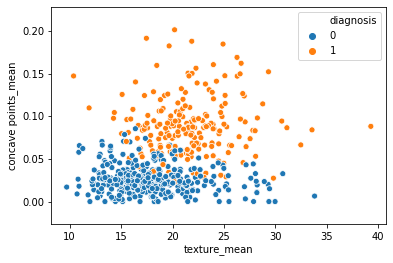

In [ ]:
# Berdasarkan 2 features: 'texture_mean' dan 'concave points_mean', terlihat cancer yang M dan B cukup terpisah
sns.scatterplot(x = 'texture_mean', y = 'concave points_mean', data = df, hue = 'diagnosis');

In [ ]:
# Check missing value
df[['texture_mean', 'concave points_mean']].isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

# **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 42)

# **KNN**

## **Without scaling**

In [ ]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)

# training model (KNN belajar dari training set)
knn.fit(X_train, y_train)

# predict (KNN memprediksi M atau B berdasarkan features di test set )
y_predict_class = knn.predict(X_test)

In [ ]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7719298245614035


## **With scaling**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, diaplikasikan hanya pada data training

X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data x_test

In [ ]:
# define model
knn = KNeighborsClassifier(n_neighbors=3)

# training model
knn.fit(X_train_scaled, y_train) # model fit

# predict
y_predict_class = knn.predict(X_test_scaled) # model predict

In [ ]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9210526315789473


**Hasil akurasi dengan metode KNN dengan menggunakan hanya menggunakan 2 features dan scaling sebesar 92.1%**

## **The best K Factor**

In [ ]:
# mencari kisaran range untuk menentukan K factor terbaik dengan mengakarkan jumlah data
np.sqrt(df.shape[0])

23.853720883753127

In [ ]:
# Find the best k

k = range(1, 30, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:

    # model
    knn = KNeighborsClassifier(n_neighbors = i)

    # training scaled data
    knn.fit(X_train_scaled, y_train)

    # akurasi pada training set
    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    # akurasi pada test set
    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    # jika ada akurasi yg lebih baik,
    if score < acc_score:
        score = acc_score
        best_k = i

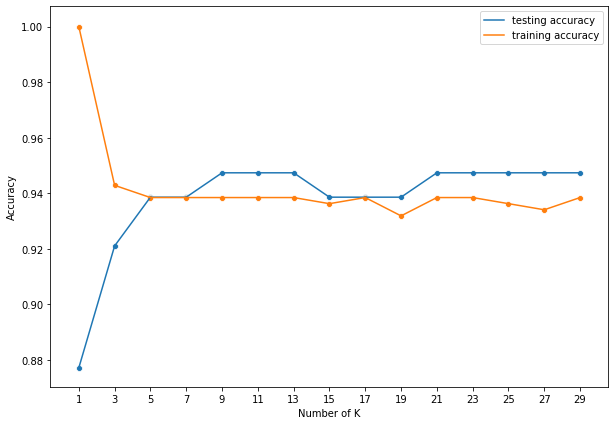

In [ ]:
# Plot the accuracies result
plt.figure(figsize=(10, 7))

# akurasi pada test set
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)

# akurasi pada train set
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)

plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.xticks(list(k))
plt.show()

In [ ]:
# The best K with its score
print('Faktor K terbaik =', best_k)
print('Nilai akurasi =', score)

Faktor K terbaik = 9
Nilai akurasi = 0.9473684210526315


### **Interpretasi**

Dari plot di atas, dapat dilihat bahwa jumlah K terbaik adalah 9 dengan accuracy mencapai 94.7%.
Semakin banyak K, trend training dan testing accuracy cenderung fluktuatif dan tidak lebih baik dari K = 9.

# **Decision Tree**

* https://scikit-learn.org/stable/modules/tree.html#tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [ ]:
# Define the model
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [ ]:
# Fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# Test the model
y_predict_class = tree.predict(X_test)

In [ ]:
# Metric result
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.8859649122807017


In [ ]:
# proporsi kelas 0 (Benign) dan kelas 1 (Malignant)
y_train['diagnosis'].value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

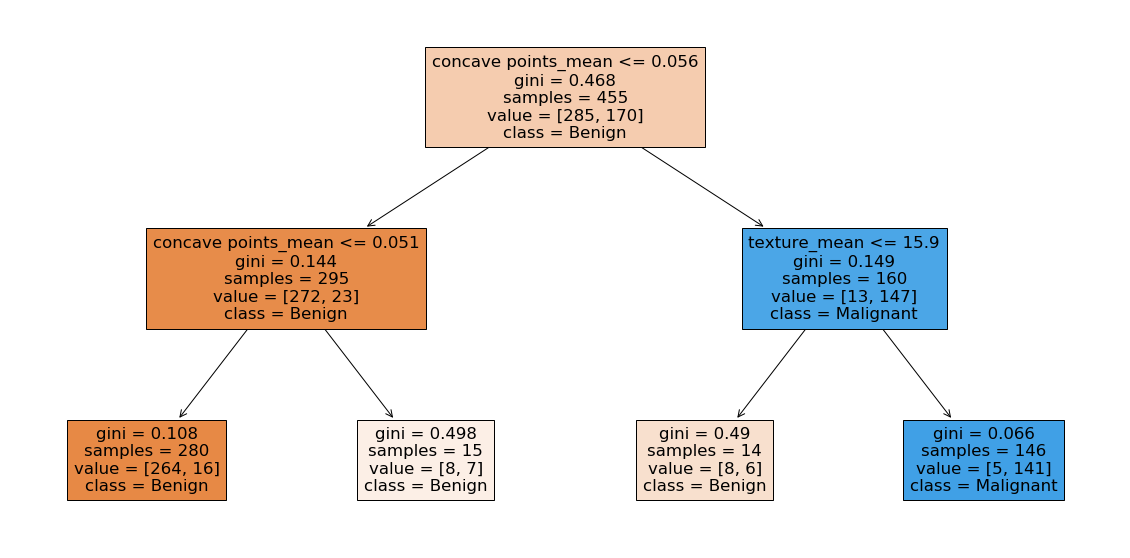

In [ ]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Benign', 'Malignant'], filled=True);

## **Interpretasi**

1. concave points_mean <= 0.056, concave points_mean <= 0.051  --> Benign
2. concave points_mean <= 0.056, concave points_mean > 0.051   --> Benign
<br><br>

1. concave points_mean > 0.056, texture_mean <= 15.9 --> Benign
2. concave points_mean > 0.056, texture_mean > 15.9  --> Malignant

*Warna*
- semakin biru: proporsi Malignant semakin besar (homogen)
- semakin orange: proporsi Benign semakin besar (homogen)
- semakin putih: proporsi Malignant dan Benign mendekati seimbang (heterogen)


## **With scaling**

In [ ]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit

X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data X_test

In [ ]:
# model
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [ ]:
# Fit
tree.fit(X_train_scaled, y_train)

# prdict
y_predict_class = tree.predict(X_test_scaled)

In [ ]:
# Metric result
print('Model accuracy in test dataset with scaling:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset with scaling: 0.8859649122807017


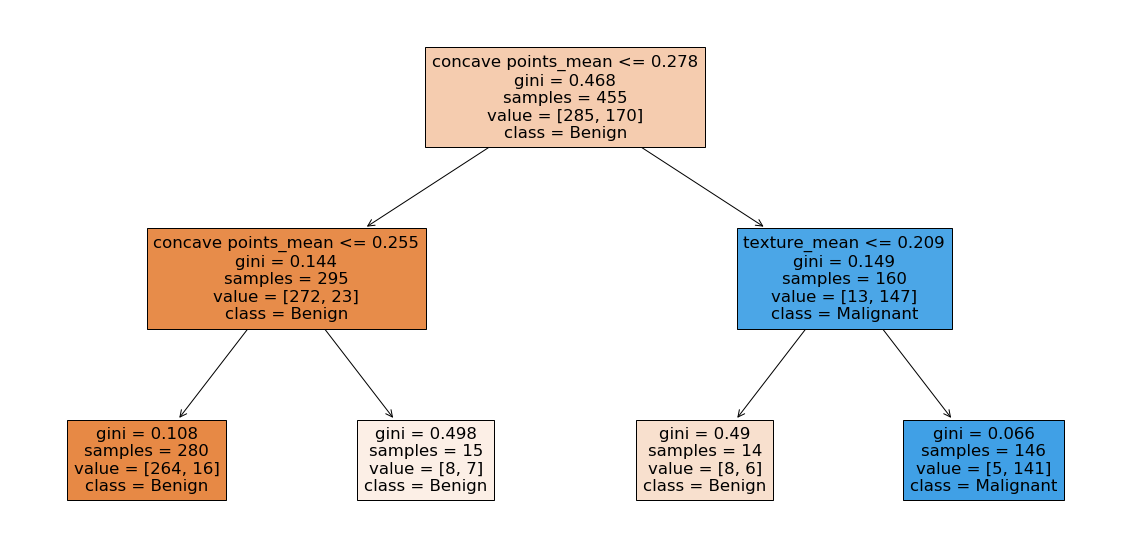

In [ ]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Benign','Malignant'], filled=True);

## **Without max_depth**

In [ ]:
tree = DecisionTreeClassifier(
    criterion='gini'
)

tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [ ]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9035087719298246


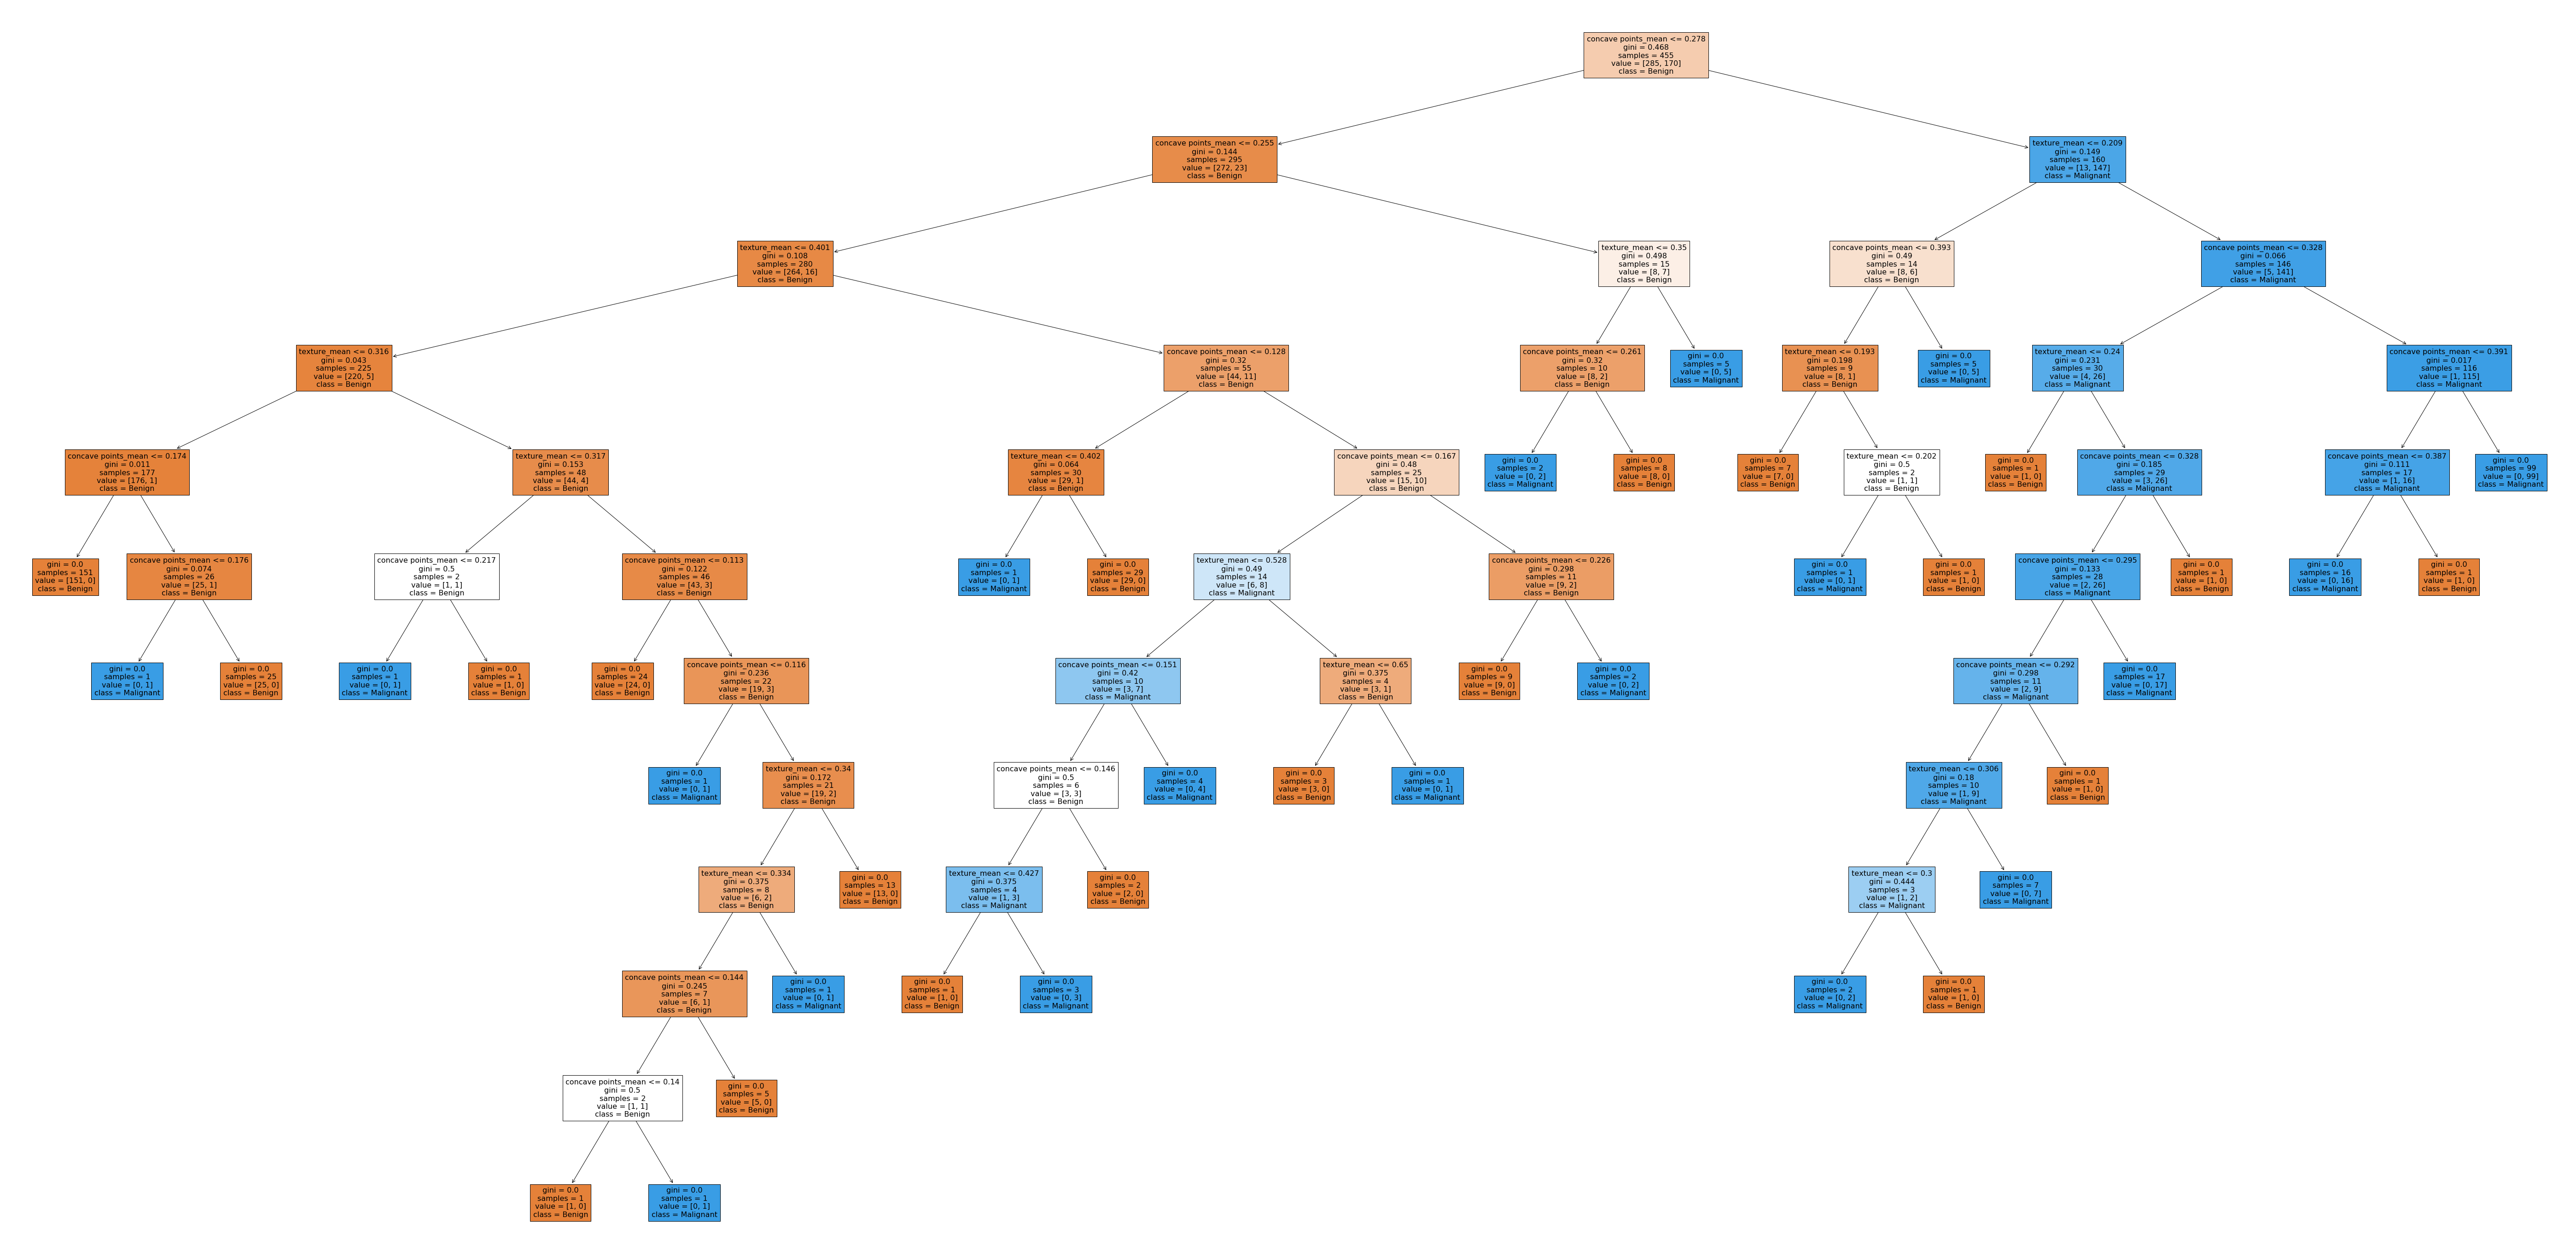

In [ ]:
plt.figure(figsize=(100, 50))
plot_tree(tree, feature_names= list(X), class_names= ['Benign', 'Malignant'], filled=True);

In [ ]:
y_train['diagnosis'].value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

## **Interpretasi**

### Dengan menggunakan model decision tree dengan depth=2, akurasi yang didapat adalah 88.5%. Lalu dilakukan scaling, namun hasil akurasi tidak berubah sama sekali. Hal ini terjadi karena meskipun dilakukan scaling, tidak ada perubahan pada heterogenitas data. Kemudian, dengan scaling, data menjadi sulit untuk di interpretasikan karena skalanya dipukul rata sehingga kita tidak mengetahui lagi, angka asli dari suatu kolom data. Dengan kata lain, model decision tidak membutuhkan scaling.

### Dilakukan juga percobaan dengan tidak memasukkan jumlah maksimum depth. Dapat dilihat pada plot, proses otomatisasi melakukan klasifikasi hingga depth ke 11 dan nilai gini menjadi 0.00 semua pada node terakhir (sudah homogen). Hal ini menyebabkan adanya peningkatan akurasi menjadi 90%, tetapi model menjadi semakin sulit untuk diinterpretasi.

### Dengan mengacu pada besarnya nilai akurasi, dapat disimpulkan bahwa model KNN dengan menggunakan scaling lebih baik daripada model Decision Tree untuk prediksi jenis kanker dengan hanya menggunakan 2 features.

## **Latihan Generalization in KNN & Decision Tree**

## **Gunakan dataset 'titanic'**

      - Features: 'pclass', 'sex', 'age', 'fare'
      - Target: 'survived'

### - Drop missing value pada features yang digunakan jika ada.
### - Lakukan data splitting dengan proporsi 80:20 dan random_state = 42

### **KNN**
### - Lakukan scaling pada data, lihat nilai akurasinya.
### - Cari nilai K terbaiknya dengan range 1-150. Interpretasikan hasilnya, kaitkan dengan overfitting dan underfitting.

### **Decision Tree**
### - Analisa performa model (overfitting, underfitting, sweet spot) dengan menggunakan hyperparameter berikut:
      - minimum samples split (min_samples_split) dengan range 2-150
      - minimum samples leaf (min_samples_leaf) dengan range 1-150
### - Jelaskan juga apa yang dilakukan hyperparameter tersebut beserta interpretasinya.

## **Latihan Model Complexity in Linear Model**

## **Gunakan dataset 'Admission_Predict'**

        - Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
        - Target: 'Chance of Admit'

- Lakukan data splitting dengan proporsi 80:20 dan random_state = 42.

- Gunakan model Ridge Regression dan Lasso Regression dengan berbagai nilai alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).
  
- Berapa nilai alpha terbaik untuk tiap model?
  
- Bandingkan performa kedua model ditinjau dari nilai MSE-nya, manakah yang lebih baik?